# Joy plot (aka ridge line plot)

In this example we'll create a joy plot, which takes its name from a [famous album cover](https://i.ytimg.com/vi/V3Ioohi9aqE/maxresdefault.jpg).

This kind of plot summarizes the distribution of a numeric variable for several groups. Each group is represented as a density chart, each density chart overlapping each other to use space more efficiently.

# Assignment

Create a ridge line plot with the number of meteorites for three periods: 1800-1850, 1850-1900, 1900-1950.

Hints:

* you can follow the example from [python-graph-gallery tutorial](https://www.python-graph-gallery.com/ridgeline-graph-plotly)
* you are expected to use plotly library, if it's not installed you can always do `!pip install plotly`
* remember that we have a function to load data in the `data_manager.py` file

## Data loading

We'll use the NASA meteorite dataset. To do so we'll need first to run the data manager using the %run magic code.

In [28]:
%run data_manager.py

At this point we can load the data directly into a pandas dataframe.

In [29]:
df = load_meteorites()
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,year_as_date
0,Aachen,1,Valid,L5,21.0,Fallen,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)",1880-01-01
1,Aarhus,2,Valid,H6,720.0,Fallen,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)",1951-01-01
2,Abee,6,Valid,EH4,107000.0,Fallen,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)",1952-01-01
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fallen,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)",1976-01-01
4,Achiras,370,Valid,L6,780.0,Fallen,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)",1902-01-01


The `year_as_date` column contains the data as DateTime entries. However we'd prefer to use the year as numeric values, so that it's easy to manipulate and do statistics. 

In [30]:
#standard imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd #this is already imported by data_manager.py

#extracting the year as a number
df['year_numeric'] = df['year_as_date'].dt.year

#a description of the year, as a number
print(df['year_numeric'].describe())

#the total number of meteorites
print('Total number of entries: ' + str(df.shape[0]))

count    38101.000000
mean      1990.161413
std         23.615956
min       1688.000000
25%       1986.000000
50%       1996.000000
75%       2002.000000
max       2101.000000
Name: year_numeric, dtype: float64
Total number of entries: 38115


It appears that we have a number of meteorites without an assigned year. We go for the easiest route and remove them.

In [31]:
df = df.dropna()          
print('Entries after dropping NAs : ' + str(df.shape[0]))

Entries after dropping NAs : 38101


At this point we can start to take a look at the distribution of the data we are going to plot. A simple histogram it's always a good starting point.

(array([5.0000e+00, 9.0000e+00, 4.8000e+01, 1.5400e+02, 4.1400e+02,
        6.4100e+02, 2.5780e+03, 3.4251e+04, 0.0000e+00, 1.0000e+00]),
 array([1688. , 1729.3, 1770.6, 1811.9, 1853.2, 1894.5, 1935.8, 1977.1,
        2018.4, 2059.7, 2101. ]),
 <a list of 10 Patch objects>)

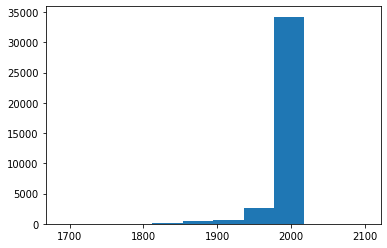

In [32]:
plt.hist(df.year_numeric)

The data are highly skewed. In fact the vast majority of meteorites has been observerd during the second half of the twentieth century. Luckily the excercise asks us to plot earlier periods, from 1800 to 1950, otherwise the plot would result *VERY* unbalanced.

## The joyplot

We are following the solution proposed in the [python-graph-gallery tutorial](https://www.python-graph-gallery.com/ridgeline-graph-plotly). The general idea is that for each line we need to add:

* add a white trace, which will serve as a baseline for the ridge area
* a trace of scatter points, with the colored area
* optionally, an annotation that tells which period we are plotting

To separate the three lines we need to:

* adjust the x values, so that they are all in the 0-50 range
* add a growing offset so that the second line will be a bit above the first one, and so on...

You are going to use a few plotly functions:

* [fig.add_trace()](https://plotly.com/python/creating-and-updating-figures/#adding-traces), a method invoked on the figure instance obtained via `go.Figure()`
* [go.scatter()](https://plotly.com/python/reference/scatter/#scatter)

Keep in mind that your jupiter lab may not be able to render plotly results on the fly. Two solutions:

1. use plotly to create an html, which you then embed as an iframe (this is the more general approach, adopted in the solution)
2. you may want to install a [jupyter extension](https://stackoverflow.com/questions/52771328/plotly-chart-not-showing-in-jupyter-notebook), so that you can use `fig.show()`. Some tweaking may be required, but the base command is: `jupyter labextension install jupyterlab-plotly`

In [33]:
#do we need to install plotly?
!pip install plotly
import plotly.graph_objects as go

In [146]:
fig = go.Figure()

#offset between lines
offset = 20

#first line
baseline = 1900
true_offset = offset * 1
label = str(baseline) + '-' + str(baseline + 50)
sel = np.array(counts.index > baseline) & np.array(counts.index <= baseline + 50)
counts_current = counts[sel]

fig.add_trace(go.Scatter(
        x=[-5, 55],
        y=np.full(2, true_offset),
        mode='lines',
        line_color='white'))

fig.add_trace(go.Scatter(
        x=counts_current.index - baseline,
        y=counts_current + true_offset,
        fill='tonexty',
        name=label))

fig.add_annotation(
        x=-5,
        y=true_offset,
        text=label,
        showarrow=False,
        yshift=10)

#second line
baseline = 1850
true_offset = offset * 2
label = str(baseline) + '-' + str(baseline + 50)
sel = np.array(counts.index > baseline) & np.array(counts.index <= baseline + 50)
counts_current = counts[sel]

fig.add_trace(go.Scatter(
        x=[-5, 55],
        y=np.full(2, true_offset),
        mode='lines',
        line_color='white'))

fig.add_trace(go.Scatter(
        x=counts_current.index - baseline,
        y=counts_current + true_offset,
        fill='tonexty',
        name=label))

fig.add_annotation(
        x=-5,
        y=true_offset,
        text=label,
        showarrow=False,
        yshift=10)

#third line
baseline = 1800
true_offset = offset * 3
label = str(baseline) + '-' + str(baseline + 50)
sel = np.array(counts.index > baseline) & np.array(counts.index <= baseline + 50)
counts_current = counts[sel]

fig.add_trace(go.Scatter(
        x=[-5, 55],
        y=np.full(2, true_offset),
        mode='lines',
        line_color='white'))

fig.add_trace(go.Scatter(
        x=counts_current.index - baseline,
        y=counts_current + true_offset,
        fill='tonexty',
        name=label))

fig.add_annotation(
        x=-5,
        y=true_offset,
        text=label,
        showarrow=False,
        yshift=10)

# here you can modify the figure and the legend titles
fig.update_layout(
                title='Number of meteorites per year',
                showlegend=False,
                xaxis=dict(title='Year'),
                yaxis=dict(showticklabels=False) # that way you hide the y axis ticks labels
                )


# If you need to save this file as a standalong html file:
fig.write_html("../results/ridgeline-graph-plotly.html")

In [142]:
%%html
<iframe src="../results/ridgeline-graph-plotly.html" width="800" height="600" title="ridgeline chart with plotly" style="border:none"></iframe>

An error occured.
ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
See the log file for details:  /tmp/jupyterlab-debug-27foeset.log
